<a href="https://colab.research.google.com/gist/hariprasath790/a8734c6a2eadae4e3d67fd59d8f0899e/untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv("sales_dataset.csv")

df.head()

Saving sales_dataset.csv to sales_dataset (1).csv


OrderID Region Product Month  Quantity  Price    Sales    Profit
0        1  North  Laptop   Dec       5.0   2506  12530.0   1325.71
1        2  North  Camera   Feb      10.0   3956  39560.0   2292.33
2        3  North  Mobile   Apr       9.0    717   6453.0   1228.08
3        4   West  Mobile   Aug      10.0   2778  27780.0  42062.94
4        5  North  Mobile   Dec       7.0   3287  23009.0   2748.84

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OrderID   470 non-null    int64  
 1   Region    470 non-null    object 
 2   Product   470 non-null    object 
 3   Month     470 non-null    object 
 4   Quantity  470 non-null    float64
 5   Price     470 non-null    int64  
 6   Sales     470 non-null    float64
 7   Profit    470 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 33.0+ KB


In [11]:
df.describe()

OrderID    Quantity        Price         Sales        Profit
count  470.000000  470.000000   470.000000    470.000000    470.000000
mean   249.059574    5.704255  2674.657447  14625.565957   2740.074638
std    144.475571    2.707445  1235.196415   9512.877226   3406.950342
min      1.000000    1.000000   509.000000    876.000000     65.610000
25%    124.500000    4.000000  1628.000000   7520.000000   1072.952500
50%    249.500000    6.000000  2572.500000  12135.000000   2007.360000
75%    370.750000    8.000000  3724.000000  20497.250000   3370.207500
max    500.000000   10.000000  4968.000000  40700.000000  44676.660000

In [10]:
df.isnull().sum()

OrderID     0
Region      0
Product     0
Month       0
Quantity    0
Price       0
Sales       0
Profit      0
dtype: int64

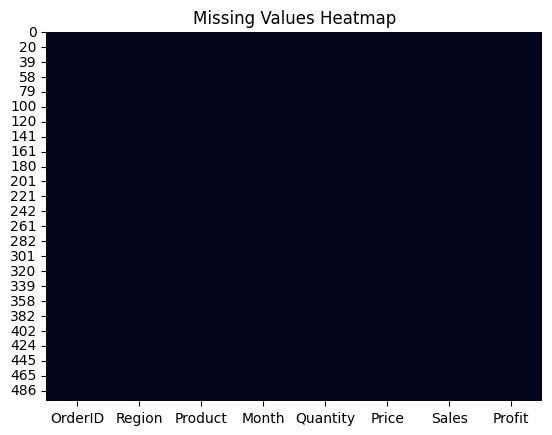

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [8]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Sales'].fillna(df['Sales'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].median(), inplace=True)

df.isnull().sum()

/tmp/ipython-input-1396967539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
/tmp/ipython-input-1396967539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

OrderID     0
Region      0
Product     0
Month       0
Quantity    0
Price       0
Sales       0
Profit      0
dtype: int64

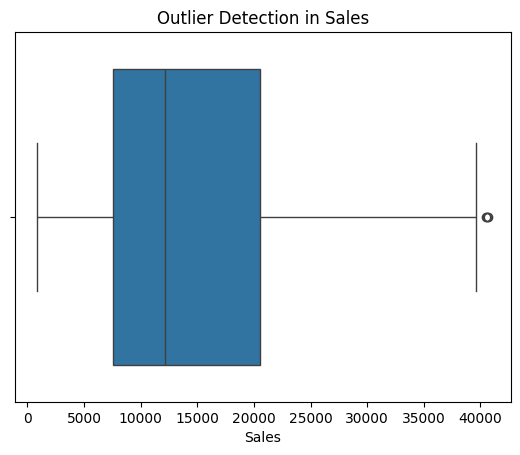

In [13]:
sns.boxplot(x=df['Sales'])
plt.title("Outlier Detection in Sales")
plt.show()

In [6]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]

df.shape


(470, 8)

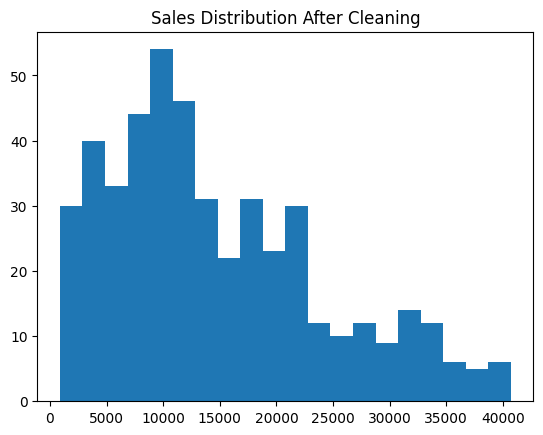

In [14]:
plt.hist(df['Sales'], bins=20)
plt.title("Sales Distribution After Cleaning")
plt.show()

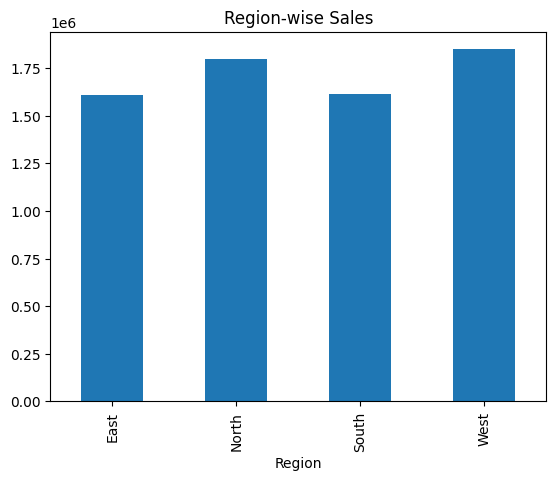

In [15]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')
plt.title("Region-wise Sales")
plt.show()

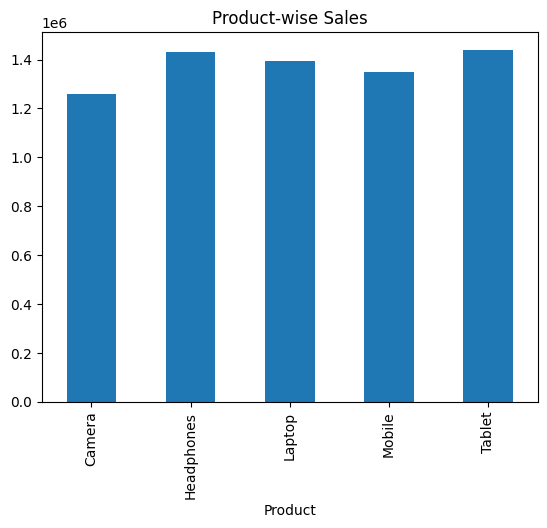

In [16]:
df.groupby('Product')['Sales'].sum().plot(kind='bar')
plt.title("Product-wise Sales")
plt.show()

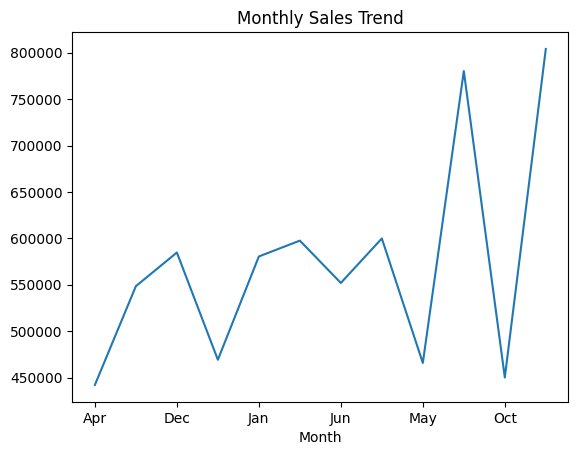

In [17]:
df.groupby('Month')['Sales'].sum().plot(kind='line')
plt.title("Monthly Sales Trend")
plt.show()